## Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Coleta dos dados

In [2]:
df = pd.read_csv("../kaggle/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Descrição dos dados

    "Obesity Levels" é um conjunto de dados que contém informações sobre características demográficas, hábitos alimentares, histórico familiar e níveis de atividade física de indivíduos, com foco na classificação da obesidade. O conjunto de dados consiste em 17 variáveis:

        1. Age: Representa a idade do indivíduo. Esta variável é quantitativa e contínua.
        2. Gender: Indica o gênero do indivíduo (masculino/feminino). Esta variável é qualitativa e nominal.
        3. Height: Refere-se à altura do indivíduo em metros. Esta variável é quantitativa e contínua.
        4. Weight: Indica o peso do indivíduo em quilogramas. Esta variável é quantitativa e contínua.
        5. CALC: Representa a frequência do consumo de álcool pelo indivíduo. Esta variável é qualitativa e nominal.
        6. FAVC: Indica a frequência do consumo de alimentos com alto teor calórico pelo indivíduo. Esta variável é qualitativa e nominal.
        7. FCVC: Refere-se à frequência do consumo de vegetais pelo indivíduo. Esta variável é quantitativa e discreta.
        8. NCP: Indica o número de refeições principais do indivíduo. Esta variável é quantitativa e discreta.
        9. SCC: Indica se o indivíduo realiza monitoração das calorias consumidas diariamente. Esta variável é qualitativa e nominal.
        10. SMOKE: Indica se o indivíduo é fumante. Esta variável é qualitativa e nominal.
        11. CH2O: Representa o consumo de água do indivíduo em litros. Esta variável é quantitativa e contínua.
        12. family_history_with_overweight: Indica se o indivíduo possui histórico familiar de sobrepeso. Esta variável é qualitativa e nominal.
        13. FAF: Refere-se ao tempo gasto em atividades físicas pelo indivíduo em horas. Esta variável é quantitativa e contínua.
        14. TUE: Indica o tempo gasto em dispositivos tecnológicos, como celulares, em horas. Esta variável é quantitativa e contínua.
        15. CAEC: Representa o consumo de comida entre as refeições (café da manhã, almoço, jantar) pelo indivíduo. Esta variável é qualitativa e nominal.
        16. MTRANS: Indica o meio de transporte usado regularmente pelo indivíduo. Esta variável é qualitativa e nominal.
        17. NObeyesdad: Refere-se à classificação de obesidade do indivíduo. Esta variável é qualitativa e ordinal.

    Esses dados são fundamentais para entender os fatores associados à obesidade e são frequentemente utilizados em tarefas de aprendizado de máquina supervisionado para desenvolver algoritmos de análise de dados relacionados à saúde e estilo de vida.

### Distribuição dos dados

In [3]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,NaN,2,NaN,NaN,4,2,NaN,NaN,2,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,Sometimes,yes,NaN,NaN,no,no,NaN,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1068,NaN,NaN,1401,1866,NaN,NaN,2015,2067,NaN,1726,NaN,NaN,1765,1580,351
mean,24.312600,NaN,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,6.345968,NaN,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,14.000000,NaN,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,19.947192,NaN,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,22.777890,NaN,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,26.000000,NaN,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

    Não há dados faltantes.

### Dicionário de dados

In [5]:
dicionario = pd.DataFrame([
    {
        "variavel": "Age",
        "descricao": "Idade do indíviduo",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Gender",
        "descricao": "Gênero do indíviduo (male/female)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "Height",
        "descricao": "Altura do indíviduo (em metros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Weight",
        "descricao": "Peso do indíviduo (em quilogramas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CALC",
        "descricao": "Frequência do consumo de álcool do indíviduo",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAVC",
        "descricao": "Frequência do consumo de alimentos com alto índice calórico",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FCVC",
        "descricao": "Frequencia do consumo de vegetais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "NCP",
        "descricao": "Número de refeições principais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "SCC",
        "descricao": "Se o indivíduo realiza monitoração das calorias consumidas diariamentes",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "SMOKE",
        "descricao": "Se o indivíduo é fumante",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "CH2O",
        "descricao": "Consumo de água do indivíduo (em litros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "family_history_with_overweight",
        "descricao": "Histórico familiar de sobrepeso",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAF",
        "descricao": "Tempo gasto em atividades físicas (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "TUE",
        "descricao": "Tempo gasto em dispositivos tecnológicos, como celulares e outros (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CAEC",
        "descricao": "Consumo de comida entre as refeições (café da manhã, almoço, jantar)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "MTRANS",
        "descricao": "Meio de transporte usado regularmente",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "NObeyesdad",
        "descricao": "Classificação de obesidade",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    }
])

dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,Age,Idade do indíviduo,quantitativa,contínua
1,Gender,Gênero do indíviduo (male/female),qualitativa,nominal
2,Height,Altura do indíviduo (em metros),quantitativa,contínua
3,Weight,Peso do indíviduo (em quilogramas),quantitativa,contínua
4,CALC,Frequência do consumo de álcool do indíviduo,qualitativa,nominal
5,FAVC,Frequência do consumo de alimentos com alto ín...,qualitativa,nominal
6,FCVC,Frequencia do consumo de vegetais do indivíduo,quantitativa,discreta
7,NCP,Número de refeições principais do indivíduo,quantitativa,discreta
8,SCC,Se o indivíduo realiza monitoração das caloria...,qualitativa,nominal
9,SMOKE,Se o indivíduo é fumante,qualitativa,nominal


### Perguntas de partida e hipóteses

    1. Correlação entre idade e nível de obesidade.
    2. Diferença de gênero na prevalência de obesidade.  
    3. Impacto do consumo de álcool e tabagismo na obesidade.  
    4. Relação entre altura, peso e obesidade.  
    5. Influência do histórico familiar de sobrepeso.  
    6. Associação entre hábitos alimentares e obesidade.  
    7. Atividade física e obesidade.  
    8. Tempo gasto em dispositivos tecnológicos e obesidade.

### 1. Correlação entre idade e nível de obesidade

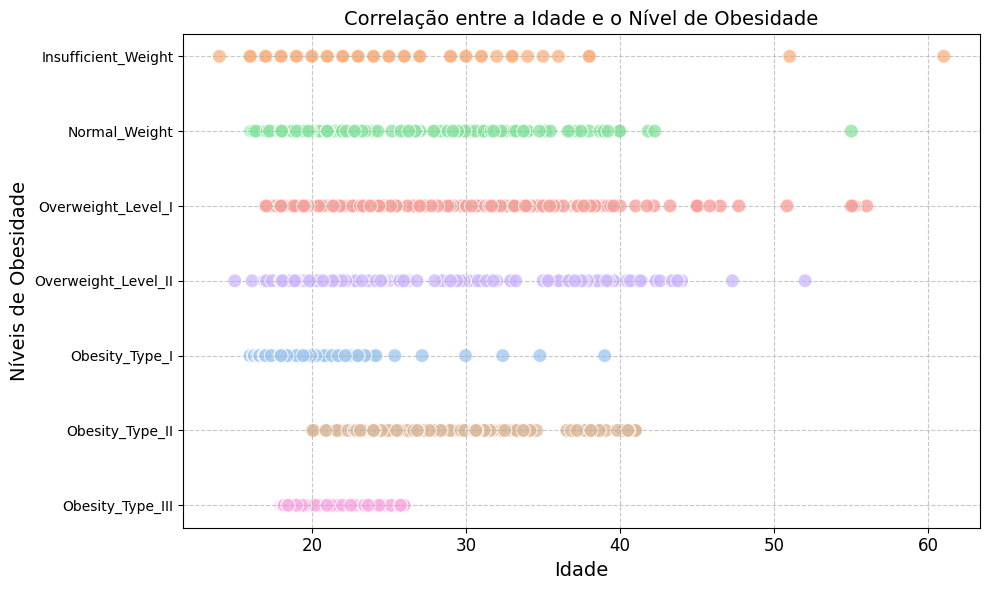

In [84]:
categorias = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

cores = sns.color_palette("pastel", len(categorias))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='NObeyesdad', hue='NObeyesdad', hue_order=categorias, palette=cores, s=100, alpha=0.8, legend=False)
plt.title('Correlação entre a Idade e o Nível de Obesidade', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Níveis de Obesidade', fontsize=14)
plt.yticks(ticks=range(len(categorias)), labels=categorias, fontsize=10)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
categorias_idade = pd.cut(df['Age'], bins=[18, 30, 40, 50, np.inf], labels=['18-30', '31-40', '41-50', '50+'])
estatisticas_por_idade_obesidade = df.groupby([categorias_idade, 'NObeyesdad'])['NObeyesdad'].count().unstack()
print(estatisticas_por_idade_obesidade)

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Age                                                              
18-30                       189            201             226   
31-40                         3             16              62   
41-50                         0              0              23   
50+                           0              2               1   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Age                                                                 
18-30                   187               323                 216   
31-40                    98                 0                  40   
41-50                    12                 0                   2   
50+                       0                 0                   1   

NObeyesdad  Overweight_Level_II  
Age                              
18-30                       172  
31-40                        80  
41-50                        10  
50+               

Os padrões identificados na distribuição da obesidade em relação à faixa etária revelam correlações importantes. A insuficiência de peso, apesar de baixa, é mais frequente em indivíduos de 16 a 36 anos, com algumas pequenas exceções. Indivíduos com peso considerado normal tendem a estar na faixa etária de 17 a 40 anos, com algumas exceções entre os 50 e 60 anos. O sobrepeso nível I é mais prevalente entre os 20 e 40 anos, enquanto o sobrepeso nível II é comum entre os indivíduos de 18 a 44 anos. A obesidade tipo I é observada principalmente em pessoas entre 20 e 45 anos. Por outro lado, a obesidade tipo II é comum entre a faixa etária de 20 a 40, assim como a obesidade tipo III. Essas tendências destacam a importância de abordagens específicas para diferentes faixas etárias na prevenção e no tratamento da obesidade, enfatizando a necessidade de promover hábitos saudáveis ao longo de toda a vida.

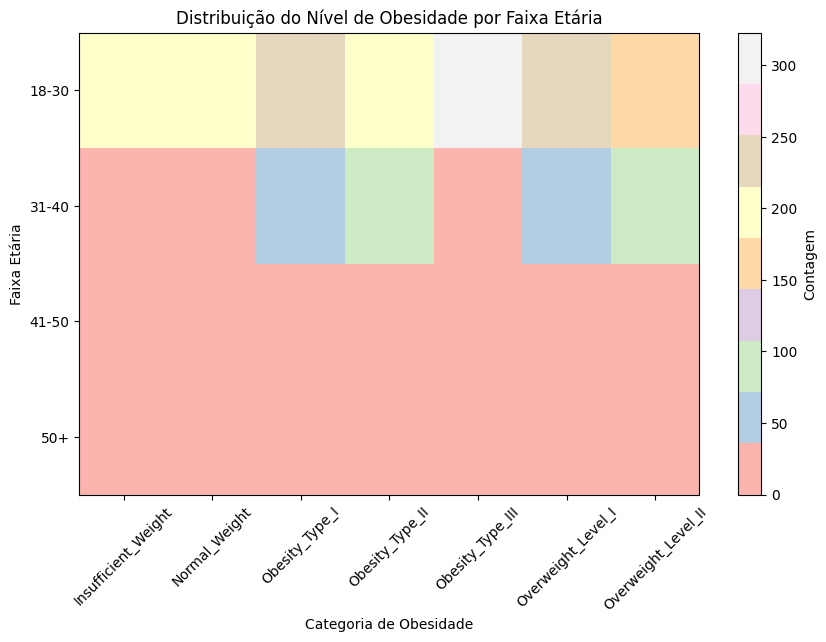

In [8]:
plt.figure(figsize=(10, 6))
plt.imshow(estatisticas_por_idade_obesidade, cmap='Pastel1', aspect='auto')
plt.title('Distribuição do Nível de Obesidade por Faixa Etária')
plt.xlabel('Categoria de Obesidade')
plt.ylabel('Faixa Etária')
plt.xticks(range(len(estatisticas_por_idade_obesidade.columns)), estatisticas_por_idade_obesidade.columns, rotation=45)
plt.yticks(range(len(estatisticas_por_idade_obesidade.index)), estatisticas_por_idade_obesidade.index)
plt.colorbar(label='Contagem')
plt.show()

### 2. Diferença de gênero na prevalência de obesidade

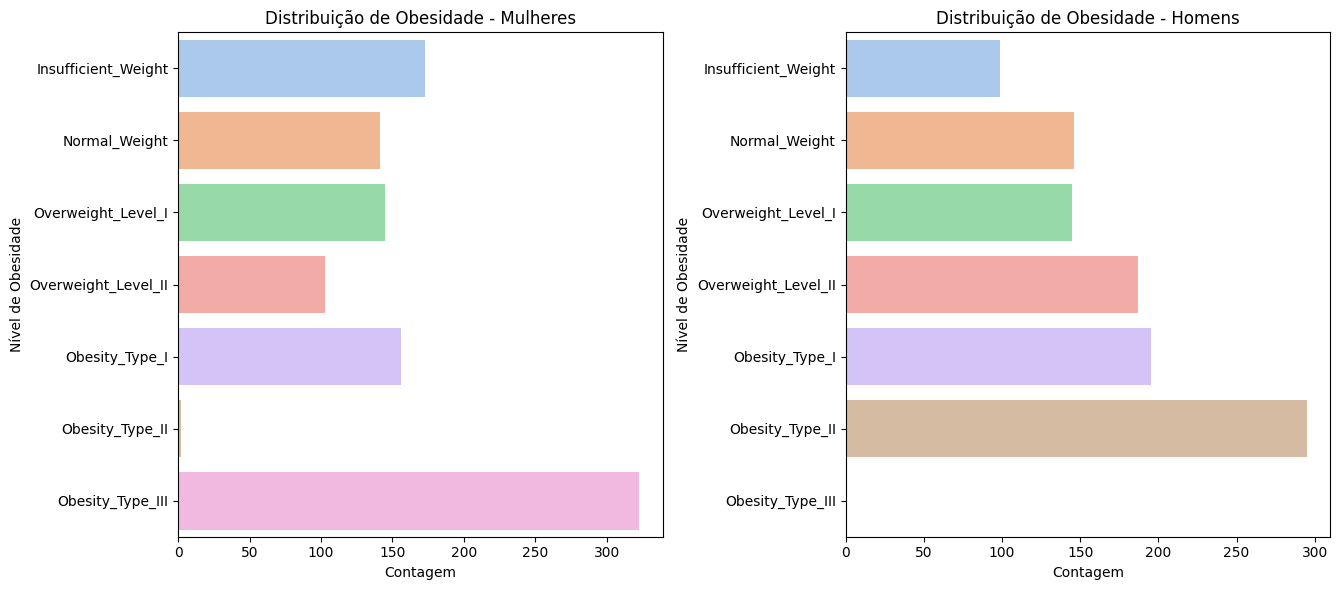

In [9]:
categorias = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

cores = sns.color_palette("pastel", len(categorias))
plt.figure(figsize=(13.5, 6))

# Gráfico para mulheres
plt.subplot(1, 2, 1)
sns.countplot(data=df[df['Gender'] == 'Female'], y='NObeyesdad', order=categorias, palette=cores)
plt.title('Distribuição de Obesidade - Mulheres')
plt.xlabel('Contagem')
plt.ylabel('Nível de Obesidade')

# Gráfico para homens
plt.subplot(1, 2, 2)
sns.countplot(data=df[df['Gender'] == 'Male'], y='NObeyesdad', order=categorias, palette=cores)
plt.title('Distribuição de Obesidade - Homens')
plt.xlabel('Contagem')
plt.ylabel('Nível de Obesidade')

plt.tight_layout()
plt.show()

In [10]:
tabela_contagem = pd.crosstab(index=df['NObeyesdad'], columns=df['Gender'])
display(tabela_contagem)

Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,173,99
Normal_Weight,141,146
Obesity_Type_I,156,195
Obesity_Type_II,2,295
Obesity_Type_III,323,1
Overweight_Level_I,145,145
Overweight_Level_II,103,187


Interessante ^ sobre obesidade tipo 2-3 em relação de homem/mulher

###  3. Impacto do consumo de álcool e tabagismo na obesidade.  

In [11]:
import pandas as pd

tabela_cruzada = pd.crosstab(index=df['NObeyesdad'], columns=[df['CALC'], df['SMOKE']])
display(tabela_cruzada)

CALC                Always Frequently     Sometimes       no    
SMOKE                   no         no yes        no yes   no yes
NObeyesdad                                                      
Insufficient_Weight      0          1   0       153   1  117   0
Normal_Weight            1         15   3       153   8  105   2
Obesity_Type_I           0         12   2       170   2  163   2
Obesity_Type_II          0          1   1       210  14   71   0
Obesity_Type_III         0          0   0       322   1    1   0
Overweight_Level_I       0         16   0       222   2   49   1
Overweight_Level_II      0         18   1       140   3  127   1

In [12]:
print("Estatísticas descritivas para consumo de álcool:")
print(df['CALC'].describe())
print("\n")
print("Estatísticas descritivas para tabagismo:")
print(df['SMOKE'].describe())
print("\n")
print("Estatísticas descritivas para níveis de obesidade:")
print(df['NObeyesdad'].describe())

Estatísticas descritivas para consumo de álcool:
count          2111
unique            4
top       Sometimes
freq           1401
Name: CALC, dtype: object


Estatísticas descritivas para tabagismo:
count     2111
unique       2
top         no
freq      2067
Name: SMOKE, dtype: object


Estatísticas descritivas para níveis de obesidade:
count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object


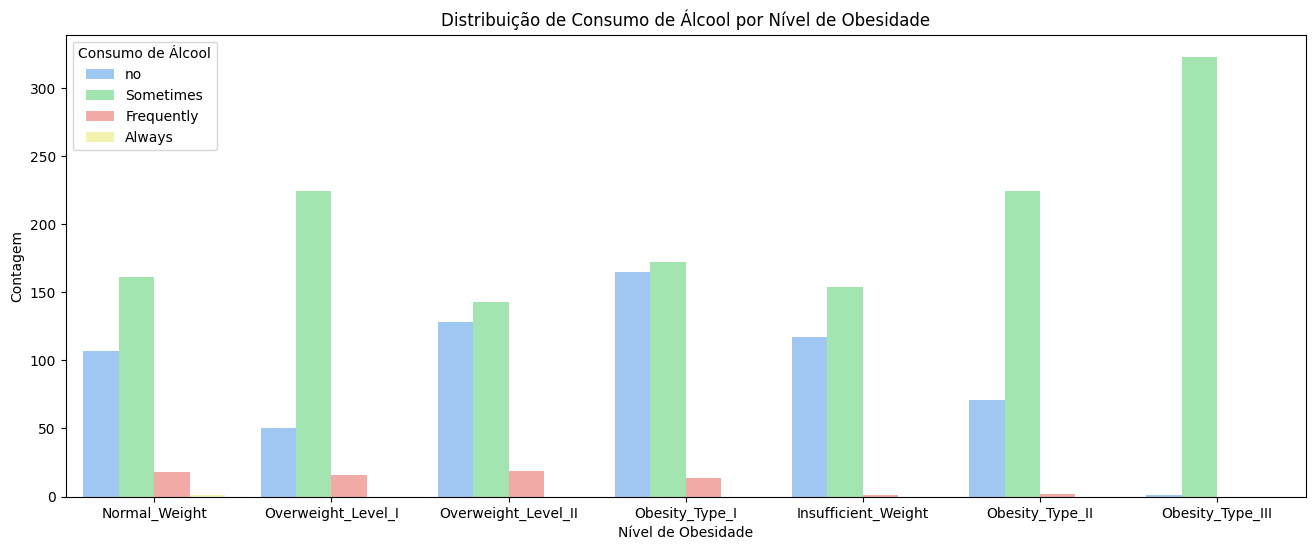

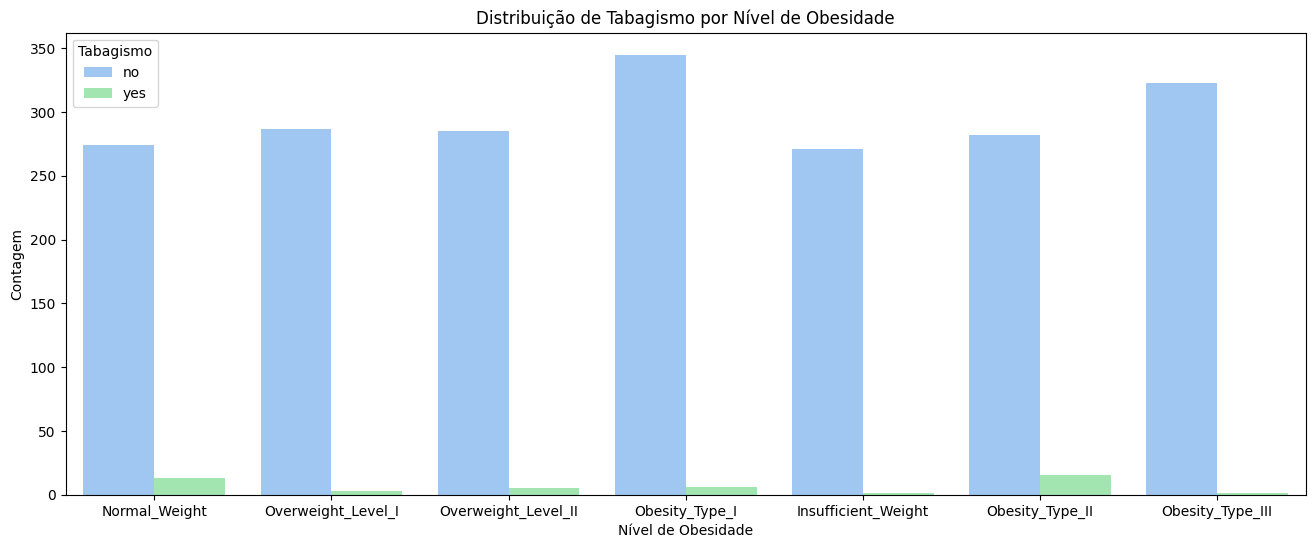

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


paleta_pastel = ["#92c6ff", "#97f0aa", "#ff9f9a", "#fffea3", "#b0e0e6", "#ffb347", "#c7c7c7"]

# Gráfico de distribuição para consumo de álcool
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='NObeyesdad', hue='CALC', palette=paleta_pastel)
plt.title('Distribuição de Consumo de Álcool por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Contagem')
plt.legend(title='Consumo de Álcool')
plt.show()

# Gráfico de distribuição para tabagismo
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='NObeyesdad', hue='SMOKE', palette=paleta_pastel)
plt.title('Distribuição de Tabagismo por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Contagem')
plt.legend(title='Tabagismo')
plt.show()

observacoes - analise - descricao

## 4. Relação entre altura, peso e obesidade.

In [14]:
4. 
# Estatísticas descritivas para altura
print("Estatísticas descritivas para altura:")
print(df['Height'].describe())
print("\n")

# Estatísticas descritivas para peso
print("Estatísticas descritivas para peso:")
print(df['Weight'].describe())
print("\n")

# Estatísticas descritivas para níveis de obesidade
print("Estatísticas descritivas para níveis de obesidade:")
print(df['NObeyesdad'].describe())


Estatísticas descritivas para altura:
count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64


Estatísticas descritivas para peso:
count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


Estatísticas descritivas para níveis de obesidade:
count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object


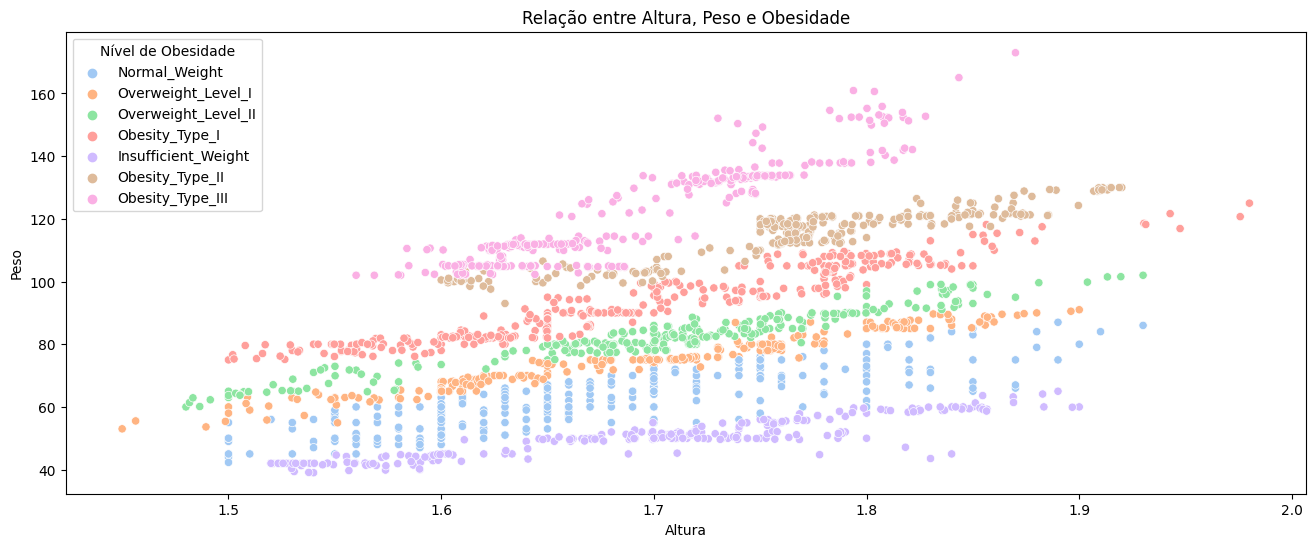

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', palette='pastel')
plt.title('Relação entre Altura, Peso e Obesidade')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(title='Nível de Obesidade')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])
correlation_matrix = df[['Height', 'Weight', 'NObeyesdad_encoded']].corr()

#### Matriz de Correlação:

In [17]:
display(correlation_matrix)

,Height,Weight,NObeyesdad_encoded
Height,1.000000,0.463136,0.038986
Weight,0.463136,1.000000,0.387643
NObeyesdad_encoded,0.038986,0.387643,1.000000



A altura ('Height') e o peso ('Weight') têm uma correlação positiva moderada de aproximadamente 0.46, o que indica que existe uma relação moderada entre a altura e o peso.
A altura e a versão codificada numericamente da variável 'NObeyesdad' têm uma correlação muito fraca, próxima de zero (0.04), o que indica que não há uma relação significativa entre altura e a categoria de obesidade codificada numericamente.
O peso e a versão codificada numericamente da variável 'NObeyesdad' têm uma correlação positiva moderada de aproximadamente 0.39, o que sugere que pode haver alguma associação entre o peso e a categoria de obesidade codificada numericamente.

## 5. Influência do histórico familiar de sobrepeso.  

In [18]:
contagem_historico = df['family_history_with_overweight'].value_counts()
print("Contagem de observações para histórico familiar de sobrepeso:")
print(contagem_historico)

Contagem de observações para histórico familiar de sobrepeso:
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64


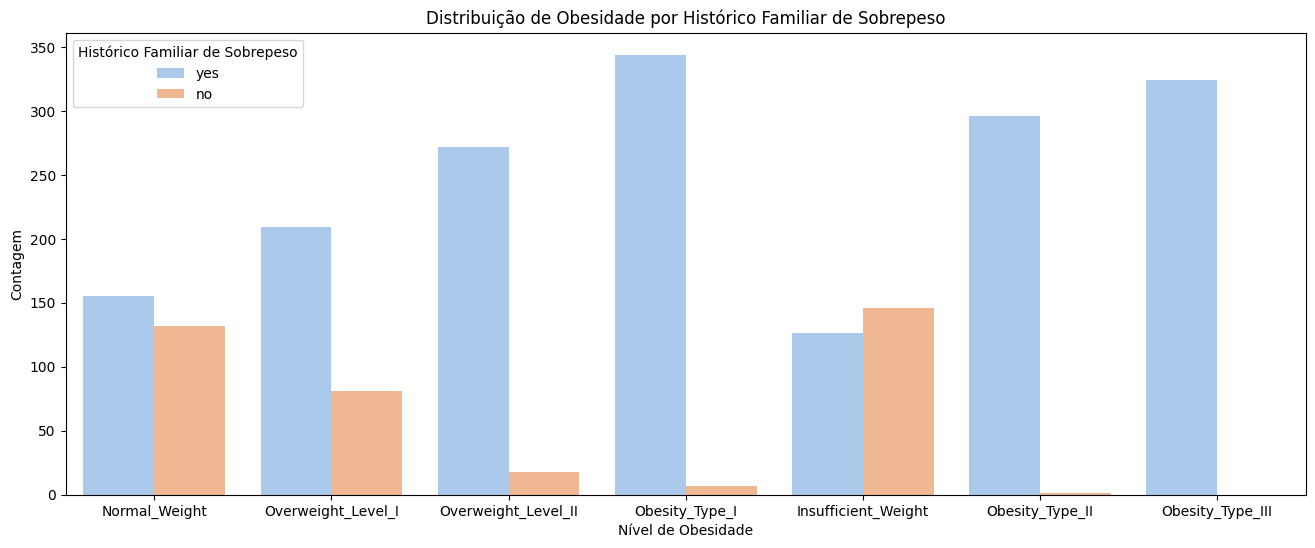

In [19]:
paleta_pastel = sns.color_palette("pastel")

plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='NObeyesdad', hue='family_history_with_overweight', palette=paleta_pastel)
plt.title('Distribuição de Obesidade por Histórico Familiar de Sobrepeso')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Contagem')
plt.legend(title='Histórico Familiar de Sobrepeso')
plt.show()

In [20]:
from scipy.stats import chi2_contingency

tabela_contingencia = pd.crosstab(df['NObeyesdad'], df['family_history_with_overweight'])

# Teste qui-quadrado
chi2, p_valor, graus_liberdade, _ = chi2_contingency(tabela_contingencia)

print("Teste Qui-quadrado:")
print("Estatística Qui-quadrado:", chi2)
print("Valor-p:", p_valor)

Teste Qui-quadrado:
Estatística Qui-quadrado: 621.9794353945298
Valor-p: 4.2280167944702657e-131


O teste Qui-quadrado foi utilizado para determinar se existe uma associação significativa entre a presença de histórico familiar de sobrepeso e os níveis de obesidade.  
O resultado do teste mostrou uma estatística Qui-quadrado alta e um valor-p extremamente baixo, indicando uma associação altamente significativa entre essas variáveis.

##### Podemos concluir que há uma relação estatisticamente significativa entre o histórico familiar de sobrepeso e os níveis de obesidade.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('NObeyesdad', axis=1)  
y = df['NObeyesdad']  #

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

colunas_faltantes = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for coluna in colunas_faltantes:
    X_test_encoded[coluna] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]

modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_train_encoded, y_train)

acuracia = accuracy_score(y_test, modelo.predict(X_test_encoded))
print("Acurácia do modelo de regressão logística atualizado:", acuracia)

Acurácia do modelo de regressão logística atualizado: 0.9952718676122931


Um modelo de regressão logística foi ajustado para prever a categoria de obesidade com base nas características individuais, incluindo o histórico familiar de sobrepeso.  
O modelo foi treinado usando dados de treinamento e avaliado usando dados de teste, com uma alta acurácia de aproximadamente 99,53%.

### 6. Associação entre hábitos alimentares e obesidade.  

In [22]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['FAVC'], df['NObeyesdad'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Estatística Qui-quadrado:", chi2)
print("Valor-p:", p_value)

Estatística Qui-quadrado: 233.34130356133423
Valor-p: 1.4822362082358762e-47


In [23]:
contingency_table = pd.crosstab(df['CAEC'], df['NObeyesdad'])
print(contingency_table)

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
CAEC                                                             
Always                        2             35               6   
Frequently                  121             83               6   
Sometimes                   146            159             338   
no                            3             10               1   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
CAEC                                                                
Always                    2                 0                   5   
Frequently                1                 1                  14   
Sometimes               293               323                 236   
no                        1                 0                  35   

NObeyesdad  Overweight_Level_II  
CAEC                             
Always                        3  
Frequently                   16  
Sometimes                   270  
no                

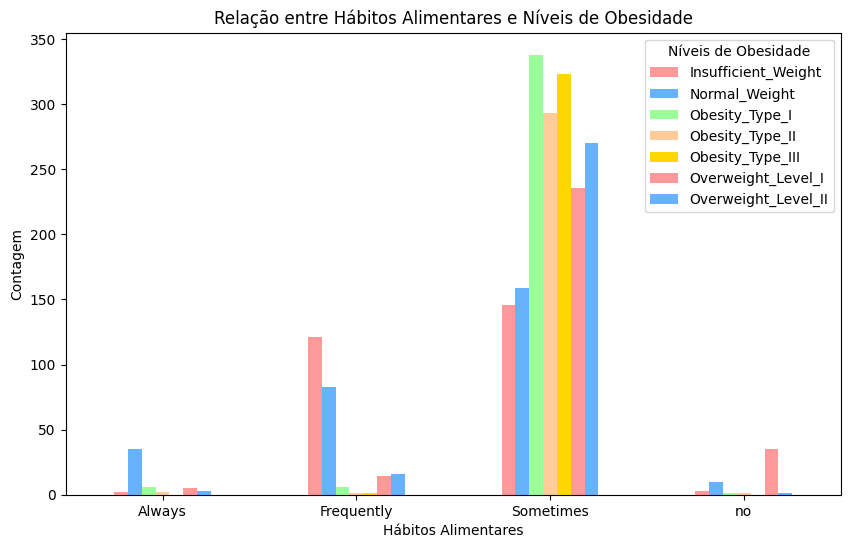

In [24]:
contingency_table.plot(kind='bar', figsize=(10, 6), color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Relação entre Hábitos Alimentares e Níveis de Obesidade')
plt.xlabel('Hábitos Alimentares')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Níveis de Obesidade')
plt.show()

In [25]:
# fazer conclusão aqui

## 7. Correlação entre Atividade física e obesidade.

In [33]:
# Convertendo a variável categórica 'NObeyesdad' em uma variável numérica
df['NObeyesdad_encoded'], _ = pd.factorize(df['NObeyesdad'])

# Calculando a correlação de Pearson entre 'FAF' e 'NObeyesdad_encoded'
correlation = df['FAF'].corr(df['NObeyesdad_encoded'])

# Exibindo o resultado da correlação
print("Correlação entre tempo gasto em atividades físicas (FAF) e nível de obesidade (NObeyesdad):", correlation)


Correlação entre tempo gasto em atividades físicas (FAF) e nível de obesidade (NObeyesdad): -0.14221093521176054


A correlação entre o tempo gasto em atividades físicas (FAF) e o nível de obesidade (NObeyesdad) é de aproximadamente -0.142. Isso indica uma correlação negativa fraca entre essas duas variáveis. Isso significa que, em geral, quanto maior o tempo gasto em atividades físicas, menor tende a ser o nível de obesidade, e vice-versa, embora a relação não seja muito forte.

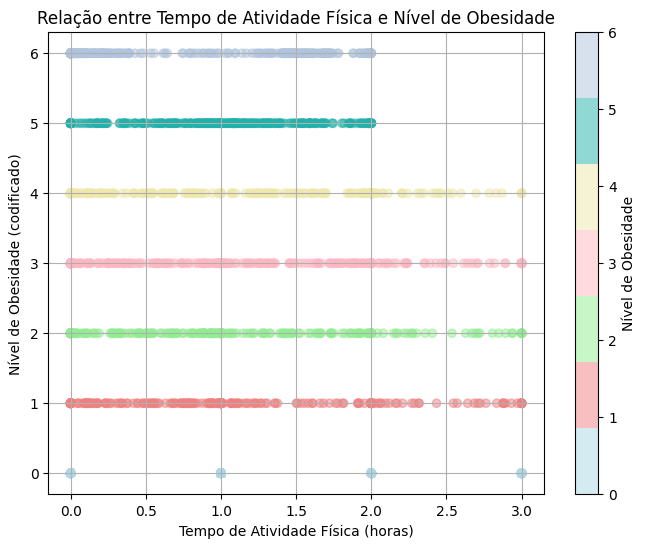

In [47]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'palegoldenrod', 'lightseagreen', 'lightsteelblue']
cmap = ListedColormap(colors)

plt.figure(figsize=(8, 6))
plt.scatter(df['FAF'], df['NObeyesdad_encoded'], alpha=0.5, c=df['NObeyesdad_encoded'], cmap=cmap)
plt.title('Relação entre Tempo de Atividade Física e Nível de Obesidade')
plt.xlabel('Tempo de Atividade Física (horas)')
plt.ylabel('Nível de Obesidade (codificado)')
plt.grid(True)
plt.colorbar(label='Nível de Obesidade')
plt.show()

In [45]:
df['NObeyesdad_encoded'], _ = pd.factorize(df['NObeyesdad'])
correlation = df['FAF'].corr(df['NObeyesdad_encoded'])
print("Correlação entre tempo gasto em atividades físicas (FAF) e nível de obesidade (NObeyesdad):", correlation)
unique_obesity_levels = df['NObeyesdad'].unique()
obesity_levels_mapping = {index: level for index, level in enumerate(unique_obesity_levels)}
print("\nMapeamento entre valores codificados e seus significados:")
for index, level in obesity_levels_mapping.items():
    print(f"{index}: {level}")


Correlação entre tempo gasto em atividades físicas (FAF) e nível de obesidade (NObeyesdad): -0.14221093521176054

Mapeamento entre valores codificados e seus significados:
0: Normal_Weight
1: Overweight_Level_I
2: Overweight_Level_II
3: Obesity_Type_I
4: Insufficient_Weight
5: Obesity_Type_II
6: Obesity_Type_III


## 8. Tempo gasto em dispositivos tecnológicos e obesidade.

In [55]:
# Calculando a correlação de Pearson entre 'TUE' e 'NObeyesdad_encoded'
correlation_tue_obesity = df['TUE'].corr(df['NObeyesdad_encoded'])

# Exibindo o resultado da correlação
print("Correlação entre tempo de uso de dispositivos tecnológicos (TUE) e nível de obesidade (NObeyesdad):", correlation_tue_obesity)


Correlação entre tempo de uso de dispositivos tecnológicos (TUE) e nível de obesidade (NObeyesdad): -0.03435492035278396


Uma correlação de -0.034 entre o tempo de uso de dispositivos tecnológicos (TUE) e o nível de obesidade (NObeyesdad) sugere uma relação muito fraca ou praticamente inexistente entre essas duas variáveis.

Essencialmente, isso significa que não há uma associação linear forte entre o tempo de uso de dispositivos tecnológicos e o nível de obesidade. Em outras palavras, o tempo que uma pessoa passa utilizando dispositivos tecnológicos não parece ter uma influência significativa no seu nível de obesidade, de acordo com essa medida de correlação.

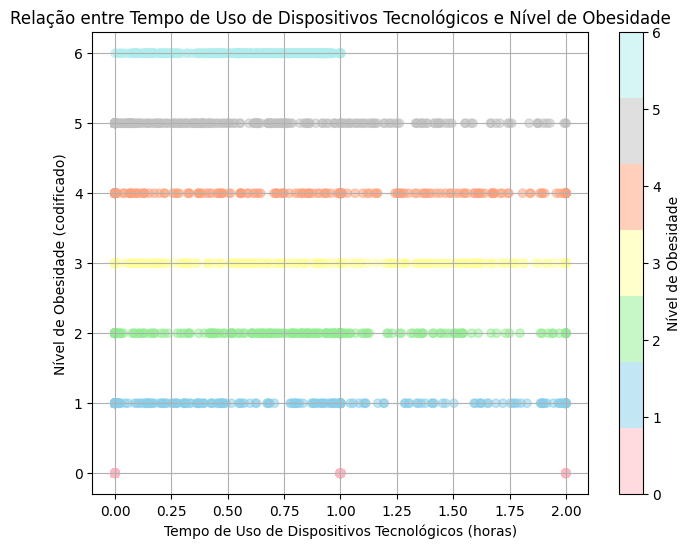

In [54]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


colors = ['#FFB6C1', '#87CEEB', '#90EE90', '#FFFF99', '#FFA07A', '#C0C0C0', '#AFEEEE']
cmap = ListedColormap(colors)


plt.figure(figsize=(8, 6))
plt.scatter(df['TUE'], df['NObeyesdad_encoded'], alpha=0.5, c=df['NObeyesdad_encoded'], cmap=cmap)
plt.title('Relação entre Tempo de Uso de Dispositivos Tecnológicos e Nível de Obesidade')
plt.xlabel('Tempo de Uso de Dispositivos Tecnológicos (horas)')
plt.ylabel('Nível de Obesidade (codificado)')
plt.grid(True)
plt.colorbar(label='Nível de Obesidade')
plt.show()

inserir analise, descricao, etc..


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = df[['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight']]
y = df['NObeyesdad_encoded']

# Converta variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

/home/devfenrir/.cache/pypoetry/virtualenvs/src-xz-KqQ4l-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.56      0.70        62
           1       0.75      0.79      0.77        56
           2       0.68      0.72      0.70        50
           3       0.89      0.82      0.85        78
           4       0.82      1.00      0.90        56
           5       0.85      1.00      0.92        58
           6       0.97      1.00      0.98        63

    accuracy                           0.84       423
   macro avg       0.84      0.84      0.83       423
weighted avg       0.85      0.84      0.84       423

                               Feature  Coefficient
0                                  Age     0.003704
1                               Height     3.769742
2                               Weight    -0.254730
3                                 FCVC     0.410442
4                                  NCP     0.407953
5                                 CH2O     0.356011
6                        Gender_Female 

/home/devfenrir/.cache/pypoetry/virtualenvs/src-xz-KqQ4l-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
model = LogisticRegression(max_iter=2000, solver='saga')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)


              precision    recall  f1-score   support

           0       0.77      0.44      0.56        62
           1       0.63      0.70      0.66        56
           2       0.55      0.64      0.59        50
           3       0.82      0.63      0.71        78
           4       0.81      0.96      0.88        56
           5       0.79      1.00      0.89        58
           6       0.93      1.00      0.96        63

    accuracy                           0.76       423
   macro avg       0.76      0.77      0.75       423
weighted avg       0.77      0.76      0.75       423

                               Feature  Coefficient
0                                  Age     0.035123
1                               Height     1.714198
2                               Weight    -0.135877
3                                 FCVC     0.813431
4                                  NCP     0.587628
5                                 CH2O     0.552857
6                        Gender_Female 

/home/devfenrir/.cache/pypoetry/virtualenvs/src-xz-KqQ4l-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [72]:
# preciso tratar esses dados pra poder fazer isso. lembrete pra eu fazer depois

Um coeficiente positivo indica que um aumento na característica está associado a um aumento na probabilidade de pertencer a uma determinada classe de obesidade.
Um coeficiente negativo indica que um aumento na característica está associado a uma diminuição na probabilidade de pertencer a uma determinada classe de obesidade.

In [27]:
# ajeitar algumas variaveis, organizar os graficos, os calculos

In [28]:
# organizar as libs

In [29]:
# padronizar os graficos (cor tom pastel, mesmo tamanho, etc

In [30]:
# estruturar melhor os topicos e manter organizado

In [71]:
tipos_de_variaveis = df.dtypes
print(tipos_de_variaveis)

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
NObeyesdad_encoded                  int64
dtype: object
